In [18]:
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
from scipy.spatial.distance import pdist, squareform

In [94]:
SUBREDDIT = "TIFU"
df = pd.read_pickle(f'Download/Cleaned Data with Longformer/{SUBREDDIT}.csv.pkl')
# df = pd.read_pickle('Download/Cleaned Data with Longformer/Confessions.csv.pkl')
df = df.sample(n=200)

In [95]:
df = pd.DataFrame(np.concatenate(df['LF pooler output'].apply(lambda row: row.numpy()).to_numpy()))

In [96]:
dis_matrix = squareform(pdist(df.to_numpy(), metric='cityblock'))
dis_matrix = dis_matrix.reshape(1,*(dis_matrix.shape))

In [97]:
import gtda.homology as hl

# represent data as a point cloud
point_cloud = dis_matrix

# define topological features to track
homology_dimensions = [0, 1, 2]

# define simplicial complex to construct
persistence = hl.VietorisRipsPersistence(
    metric="precomputed", homology_dimensions=homology_dimensions
)

# calculate persistence diagram
persistence_diagram = persistence.fit_transform(dis_matrix)

In [98]:
from gtda.plotting import plot_diagram

$i$-dimensional homology $H_i$ "counts the number of $i$-dimensional holes"

0-dimensional homology $H_0$ "counts connected components" 

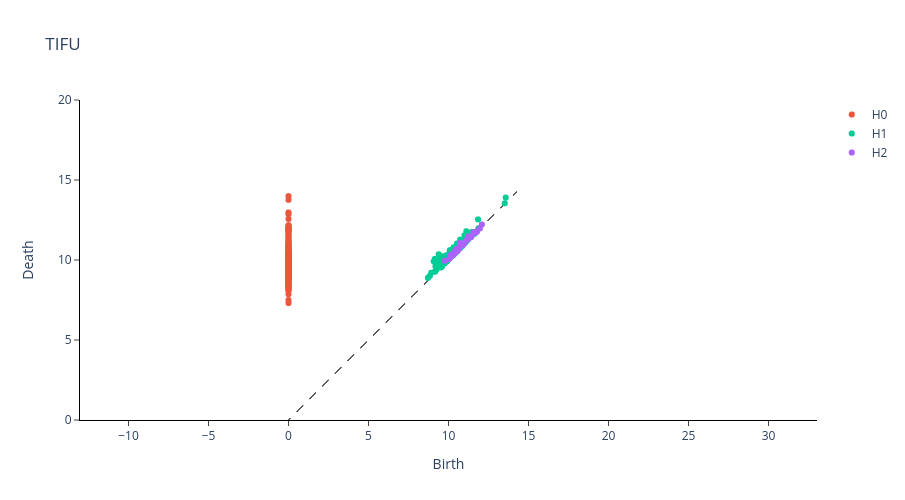

In [99]:
fig = plot_diagram(persistence_diagram[0], 
                   plotly_params={"layout":{"title": {"text": SUBREDDIT}}})
layout = go.Layout(
    xaxis=dict(range=[0,20]),
    yaxis=dict(range=[0,20])
)
fig = fig.update(layout=layout)
fig.show()

In [100]:
import pandas as pd

# define topological features to track
homology_dimensions = [0, 1, 2]

# convert NumPy array of triples to DataFrame
persistence_table = pd.DataFrame(
    persistence_diagram[0], columns=["birth", "death", "homology_dim"]
)

# calculate the lifetime per point
persistence_table["lifetime"] = persistence_table["death"] - persistence_table["birth"]

In [101]:
# calculate average lifetimes per homology dimension
average_lifetimes = [
    persistence_table.query(f"homology_dim == {homology_dim}")["lifetime"].mean()
    for homology_dim in homology_dimensions
]

In [102]:
[SUBREDDIT] + average_lifetimes

['TIFU', 9.89766955255863, 0.2522683882377517, 0.092142211066352]

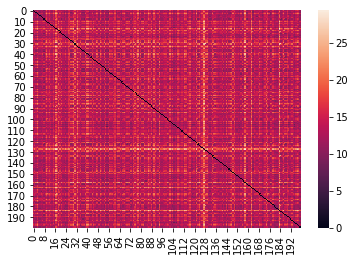

In [103]:
import numpy as np
import seaborn as sns
ax = sns.heatmap(dis_matrix[0])

In [104]:
li.append([SUBREDDIT] + average_lifetimes)

In [105]:
li

[['NoSleep', 10.821196939477968, 0.27610954557146344, 0.12348072745583275],
 ['CreepyPasta', 11.19383672493786, 0.3292162543848941, 0.14677632649739583],
 ['ShortScaryStories',
  11.265323341791355,
  0.32793572112804154,
  0.1413110097249349],
 ['Confessions', 9.992815262109191, 0.2929453720917573, 0.15801482730441624],
 ['Self', 10.30364236400355, 0.24750015299807313, 0.1355281629060444],
 ['StoriesAboutKevin',
  10.241118639557804,
  0.25865660932727325,
  0.13100695610046387],
 ['TIFU', 9.89766955255863, 0.2522683882377517, 0.092142211066352]]

In [106]:
df_lt = pd.DataFrame(li, columns=['Subreddit', 'H0', 'H1', 'H2'])

In [107]:
df_lt['Category'] = df_lt.apply(lambda row: 'Creepy' if row['Subreddit'] in ['NoSleep', 'CreepyPasta', 'ShortScaryStories'] else 'Non-creepy', axis=1)

In [108]:
df_lt.groupby('Category').aggregate('mean')

,H0,H1,H2
Category,,,
Creepy,11.093452,0.311087,0.137189
Non-creepy,10.108811,0.262843,0.129173
